# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv

porter_df = pd.read_csv("porter_data_1.csv")
porter_df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [5]:
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [7]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter_df['created_at'] = pd.to_datetime(porter_df['created_at'])
porter_df['actual_delivery_time'] = pd.to_datetime(porter_df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [9]:
# Convert categorical features to category type

# store_primary_category (restaurant type) and order_protocol are categorical variables. 
# We will convert them into numeric form using one-hot encoding.

porter_df = pd.get_dummies(porter_df, columns=['store_primary_category', 'order_protocol'], drop_first=True)
porter_df.head()

market_id          created_at actual_delivery_time  total_items  subtotal  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17            4      3441   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25            1      1900   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35            4      4771   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46            1      1525   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  ...  store_primary_category_69  \
0                14.0  ...                      False   
1                 2.0  ...                      False   
2                 6.0  ...                      False   
3                 6.0  ...                      False   
4                 5.0  ...                      False   

   store_primary_category_70  store_primary_category_71  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   store_primary_category_72  order_protocol_2.0  order_protocol_3.0  \
0                      False               False               False   
1                      False                True               False   
2                      False               False                True   
3                      False               False               False   
4                      False               False               False   

   order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   order_protocol_7.0  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 90 columns]

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [11]:
# Calculate time taken in minutes
porter_df['delivery_duration'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [13]:
# Extract the hour and day of week from the 'created_at' timestamp

porter_df['order_hour'] = porter_df['created_at'].dt.hour  # Extract hour
porter_df['order_day_of_week'] = porter_df['created_at'].dt.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)

# Create a categorical feature 'isWeekend'

porter_df['isWeekend'] = porter_df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [15]:
# Drop unnecessary columns
porter_df = porter_df.drop(['created_at', 'actual_delivery_time'], axis=1)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [17]:
# Define target variable (y) and features (X)

# Target variable: delivery duration
y = porter_df['delivery_duration']

# Input features: all columns except 'delivery_duration'
X = porter_df.drop(['delivery_duration'], axis=1)

print("Input Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

Input Features (X):
   market_id  total_items  subtotal  num_distinct_items  min_item_price  \
0        1.0            4      3441                   4             557   
1        2.0            1      1900                   1            1400   
2        2.0            4      4771                   3             820   
3        1.0            1      1525                   1            1525   
4        1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  ...  store_primary_category_72  \
0                      21.0     34.44  ...                      False  

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [19]:
# Split data into training and testing sets

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training Features Shape: ", X_train.shape)
print("Testing Features Shape: ", X_test.shape)
print("Training Target Shape: ", y_train.shape)
print("Testing Target Shape: ", y_test.shape)

Training Features Shape:  (140621, 91)
Testing Features Shape:  (35156, 91)
Training Target Shape:  (140621,)
Testing Target Shape:  (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [21]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Define numerical columns
numerical_cols = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 
    'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 
    'total_outstanding_orders', 'distance', 'order_hour', 'order_day_of_week'
]

# Define categorical columns
categorical_cols = [
    'isWeekend',  # The binary weekend feature
] + [col for col in porter_df.columns if col.startswith('store_primary_category_')] + \
    [col for col in porter_df.columns if col.startswith('order_protocol_')]  # One-hot encoded features


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

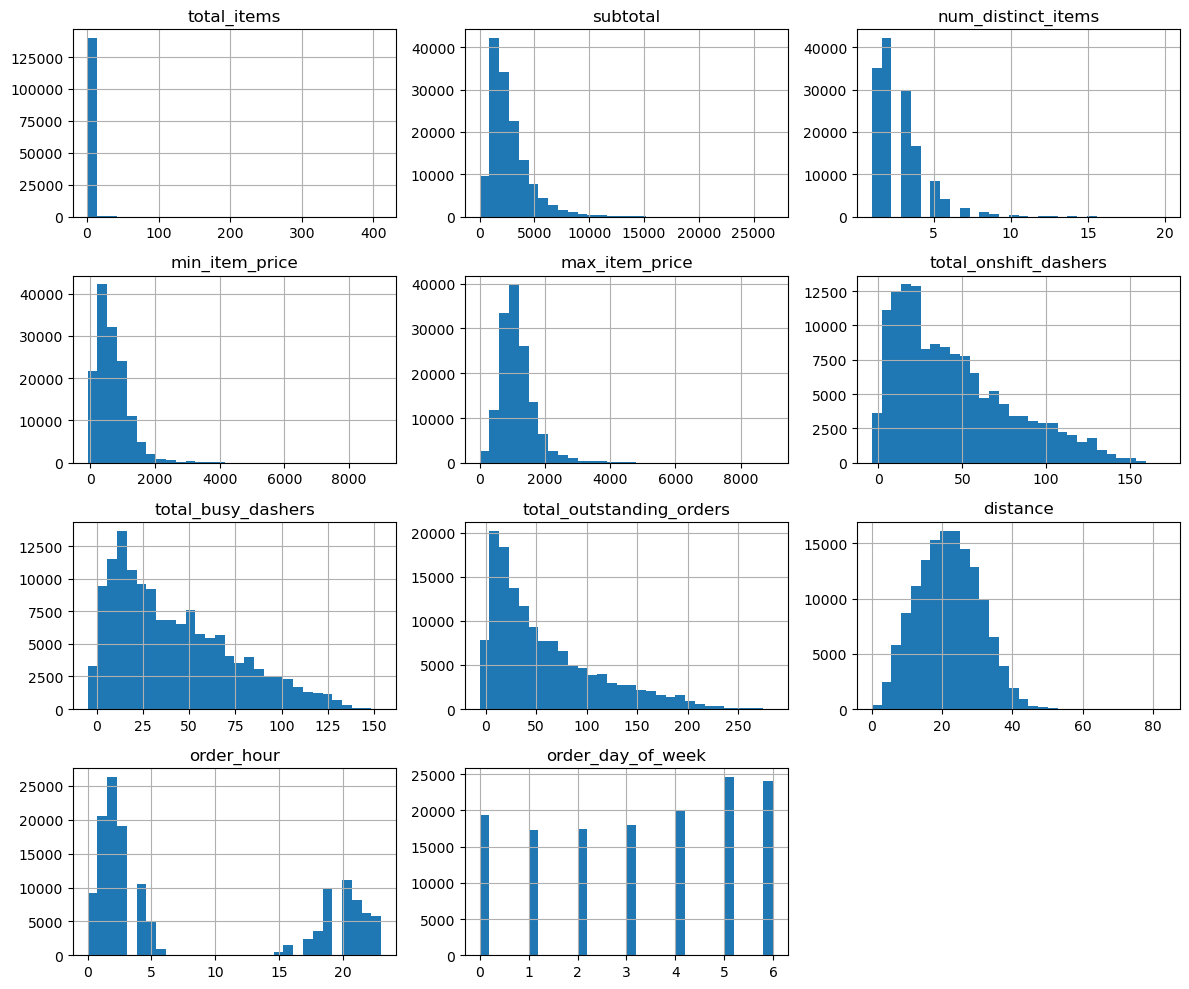

In [23]:
# Plot distributions for all numerical columns

# Plot histograms for numerical features
X_train[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

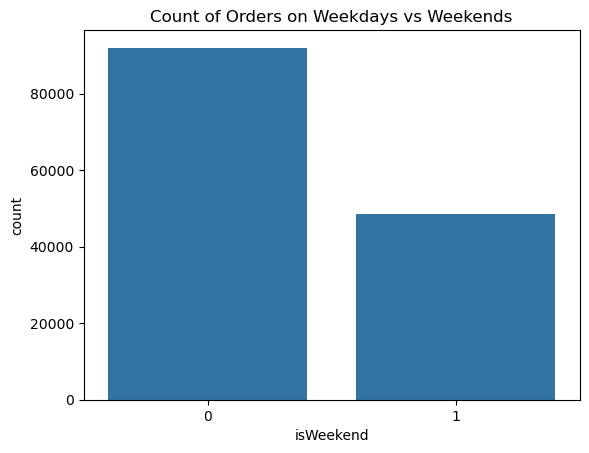

In [25]:
# Distribution of categorical columns

# Plot bar plots for categorical features like 'isWeekend'
sns.countplot(x='isWeekend', data=X_train)
plt.title("Count of Orders on Weekdays vs Weekends")
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

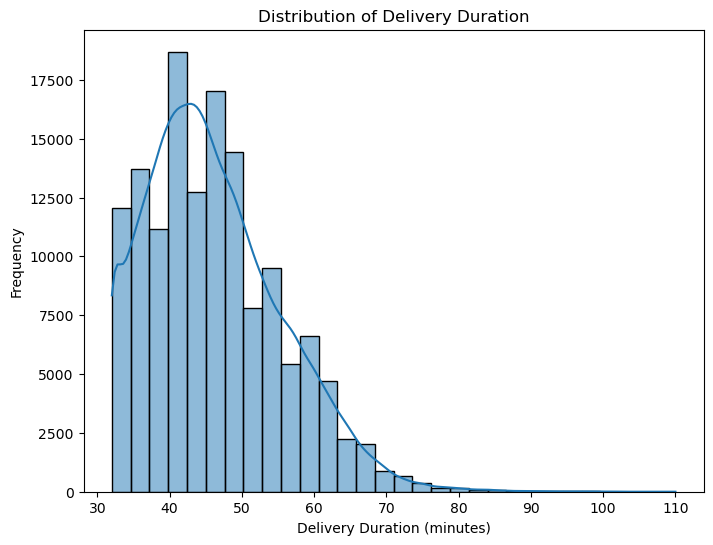

In [27]:
# Distribution of time_taken

# Plot histogram for the target variable 'delivery_duration'
plt.figure(figsize=(8, 6))
sns.histplot(y_train, bins=30, kde=True)  # KDE adds a smooth curve to the histogram
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

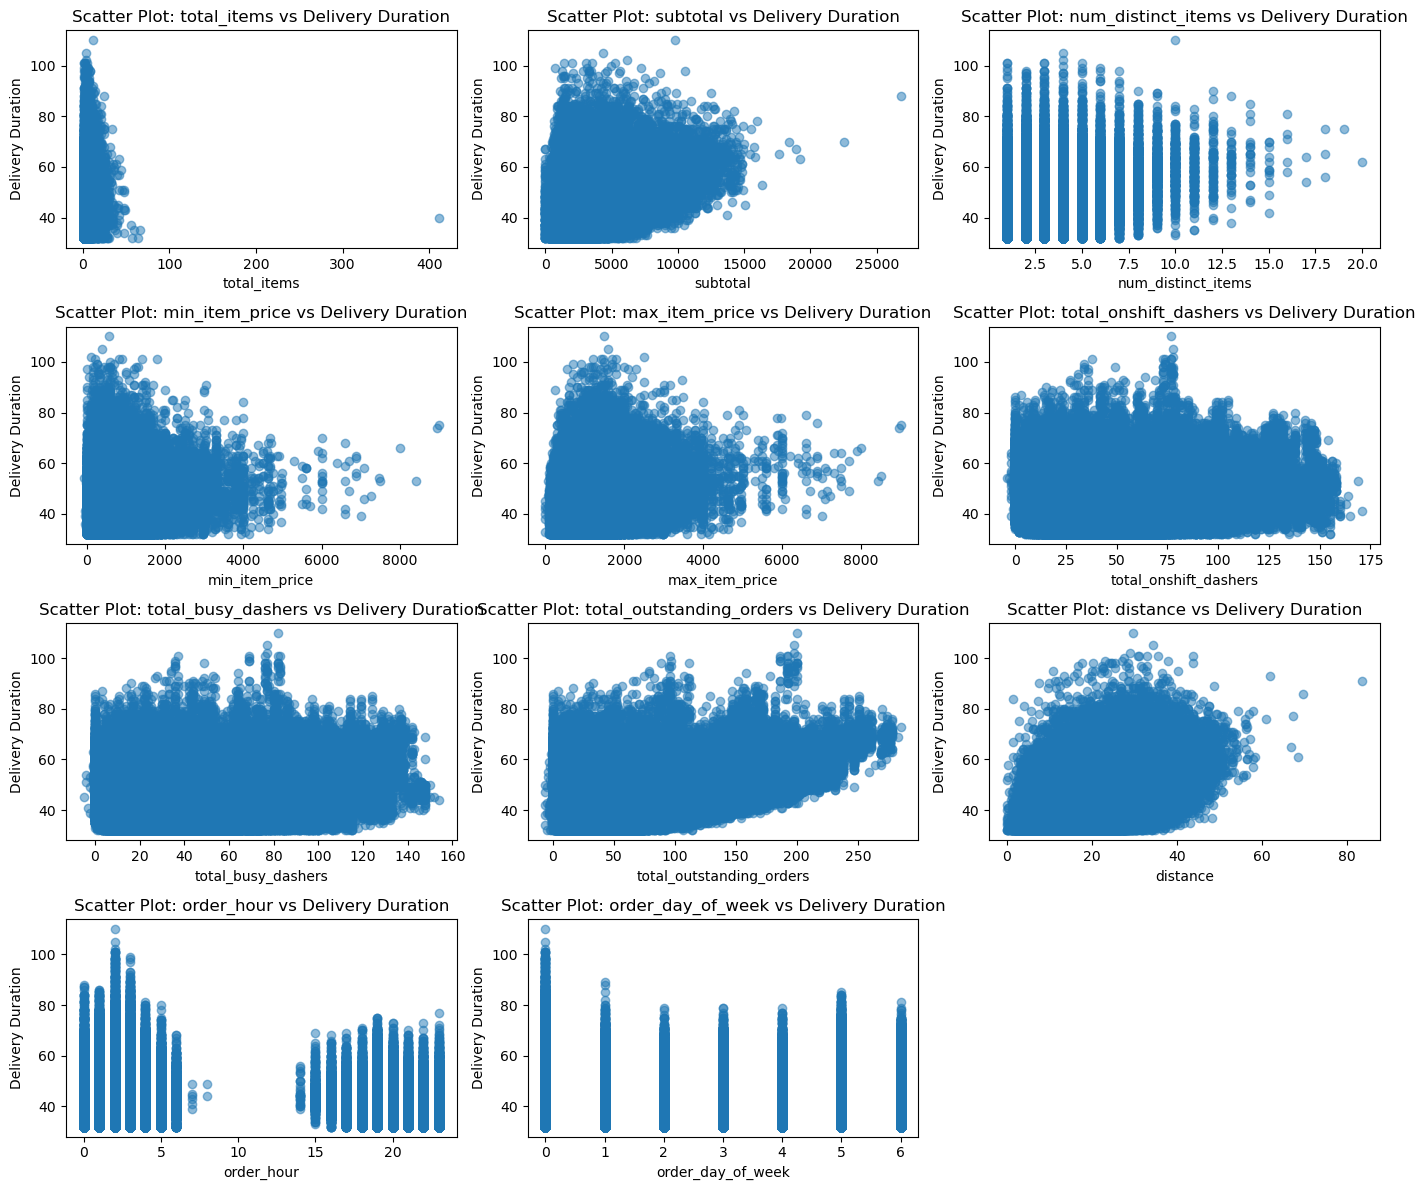

In [29]:
# Scatter plot to visualise the relationship between time_taken and other features

# Scatter plots for numerical features against 'delivery_duration'
plt.figure(figsize=(14, 12))

# Loop through each numerical column and plot against the target variable 'delivery_duration'
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Adjust the layout as needed
    plt.scatter(X_train[col], y_train, alpha=0.5)
    plt.title(f'Scatter Plot: {col} vs Delivery Duration')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration')

plt.tight_layout()
plt.show()

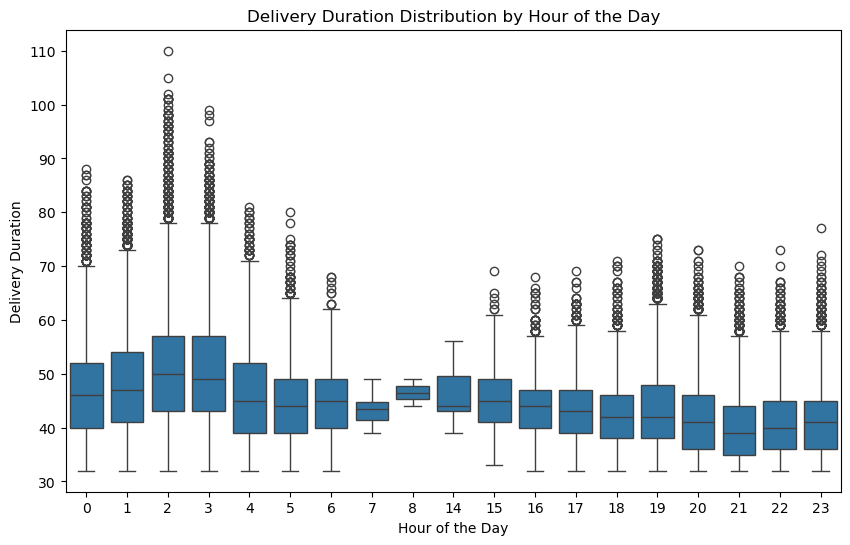

In [31]:
# Show the distribution of time_taken for different hours

# Box plot for delivery_duration distribution for different hours of the day
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train)
plt.title('Delivery Duration Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Delivery Duration')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

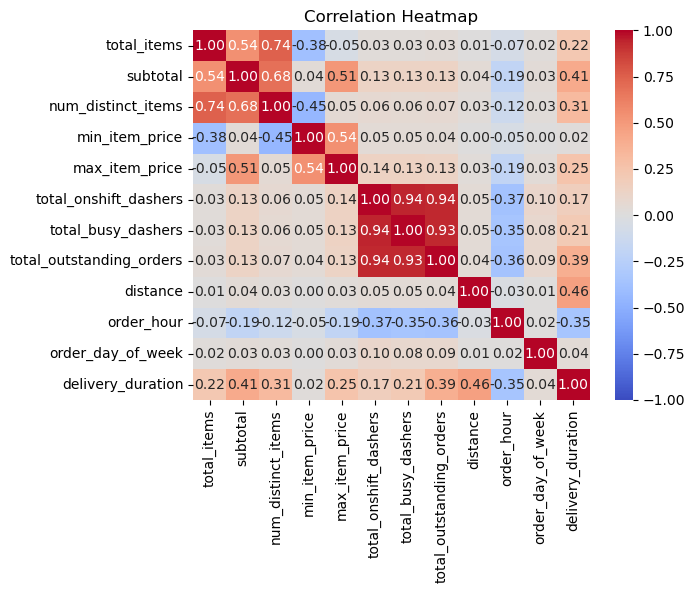

In [33]:
# Plot the heatmap of the correlation matrix

# Concatenate the target variable 'delivery_duration' to the training features to calculate correlations
corr_matrix = X_train[numerical_cols].copy()
corr_matrix['delivery_duration'] = y_train

# Calculate the correlation matrix
correlation = corr_matrix.corr()

# Plot heatmap for correlations
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Calculate the correlation matrix for all columns
corr_matrix = X_train.copy()
corr_matrix['delivery_duration'] = y_train

# Calculate the correlation matrix
correlation = corr_matrix.corr()
correlation

market_id  total_items  subtotal  num_distinct_items  \
market_id            1.000000     0.002791 -0.002201            0.014322   
total_items          0.002791     1.000000  0.543567            0.744101   
subtotal            -0.002201     0.543567  1.000000            0.680145   
num_distinct_items   0.014322     0.744101  0.680145            1.000000   
min_item_price      -0.010804    -0.383225  0.037829           -0.446952   
...                       ...          ...       ...                 ...   
order_protocol_7.0   0.017757    -0.001787  0.000519           -0.001614   
order_hour          -0.007835    -0.069305 -0.189986           -0.118819   
order_day_of_week   -0.002357     0.021394  0.033253            0.028814   
isWeekend           -0.002933     0.027876  0.049037            0.042703   
delivery_duration   -0.075067     0.220804  0.413392            0.312510   

                    min_item_price  max_item_price  total_onshift_dashers  \
market_id                -0.010804       -0.006963               0.073035   
total_items              -0.383225       -0.053431               0.031184   
subtotal                  0.037829        0.509309               0.131982   
num_distinct_items       -0.446952        0.047744               0.064244   
min_item_price            1.000000        0.539793               0.045649   
...                            ...             ...                    ...   
order_protocol_7.0        0.002326       -0.003299              -0.009976   
order_hour               -0.052611       -0.189713              -0.374849   
order_day_of_week         0.000393        0.032268               0.101515   
isWeekend                 0.002388        0.048209               0.090310   
delivery_duration         0.021151        0.254650               0.171828   

                    total_busy_dashers  total_outstanding_orders  distance  \
market_id                     0.064083                  0.066584  0.018255   
total_items                   0.028789                  0.034151  0.007402   
subtotal                      0.127071                  0.130912  0.039663   
num_distinct_items            0.059669                  0.066370  0.025774   
min_item_price                0.046491                  0.043953  0.003809   
...                                ...                       ...       ...   
order_protocol_7.0           -0.010891                 -0.009045 -0.009385   
order_hour                   -0.350172                 -0.361782 -0.026272   
order_day_of_week             0.084597                  0.085817  0.008819   
isWeekend                     0.109466                  0.115910  0.009039   
delivery_duration             0.206514                  0.385028  0.461026   

                    ...  order_protocol_2.0  order_protocol_3.0  \
market_id           ...            0.064557            0.034583   
total_items         ...           -0.001524            0.001972   
subtotal            ...            0.003416            0.069168   
num_distinct_items  ...           -0.002765            0.034928   
min_item_price      ...            0.008761            0.009218   
...                 ...                 ...                 ...   
order_protocol_7.0  ...           -0.004152           -0.006845   
order_hour          ...            0.031539           -0.017593   
order_day_of_week   ...           -0.003850           -0.005682   
isWeekend           ...           -0.011208           -0.005736   
delivery_duration   ...            0.018695            0.028366   

                    order_protocol_4.0  order_protocol_5.0  \
market_id                     0.025839           -0.047965   
total_items                   0.094376           -0.039723   
subtotal                     -0.165048            0.008803   
num_distinct_items           -0.002167           -0.031891   
min_item_price               -0.145536            0.030587   
...                                ...                 ...   
order_

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [37]:
# Drop 3-5 weakly correlated columns from training dataset

# Get the correlation of each numerical feature with the target variable 'delivery_duration'
target_corr = correlation['delivery_duration'].drop('delivery_duration')  # Drop the target variable itself

# Identify columns with weak correlations (absolute correlation below 0.1)
weakly_correlated_cols = target_corr[target_corr.abs() < 0.20].index.tolist()

# Display the weakly correlated columns
print(f"Weakly correlated columns with the target variable: {weakly_correlated_cols}")

# Drop the weakly correlated columns from the training dataset
X_train_filtered_1 = X_train.drop(columns=weakly_correlated_cols)

# DShape of the dataset after dropping the columns
print(f"Shape of the dataset after dropping weakly correlated columns: {X_train_filtered_1.shape}")


Weakly correlated columns with the target variable: ['market_id', 'min_item_price', 'total_onshift_dashers', 'store_primary_category_1', 'store_primary_category_2', 'store_primary_category_3', 'store_primary_category_4', 'store_primary_category_5', 'store_primary_category_6', 'store_primary_category_7', 'store_primary_category_8', 'store_primary_category_9', 'store_primary_category_10', 'store_primary_category_11', 'store_primary_category_12', 'store_primary_category_13', 'store_primary_category_14', 'store_primary_category_15', 'store_primary_category_16', 'store_primary_category_17', 'store_primary_category_18', 'store_primary_category_19', 'store_primary_category_20', 'store_primary_category_22', 'store_primary_category_23', 'store_primary_category_24', 'store_primary_category_25', 'store_primary_category_26', 'store_primary_category_27', 'store_primary_category_28', 'store_primary_category_29', 'store_primary_category_30', 'store_primary_category_31', 'store_primary_category_32', '

In [39]:
X_train_filtered_1.head()

total_items  subtotal  num_distinct_items  max_item_price  \
102712            1       820                   1             745   
94576             1       995                   1             995   
49784             4      2040                   4             895   
37753             2      2376                   2            1399   
91728             1      1430                   1            1320   

        total_busy_dashers  total_outstanding_orders  distance  \
102712                39.0                      56.0     30.32   
94576                 72.0                     116.0     31.16   
49784                  3.0                       7.0     18.16   
37753                 17.0                      19.0     33.44   
91728                 47.0                      52.0     31.56   

        store_primary_category_21  order_hour  
102712                      False          21  
94576                       False           2  
49784                       False          21  
37753                       False           3  
91728                       False          21

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

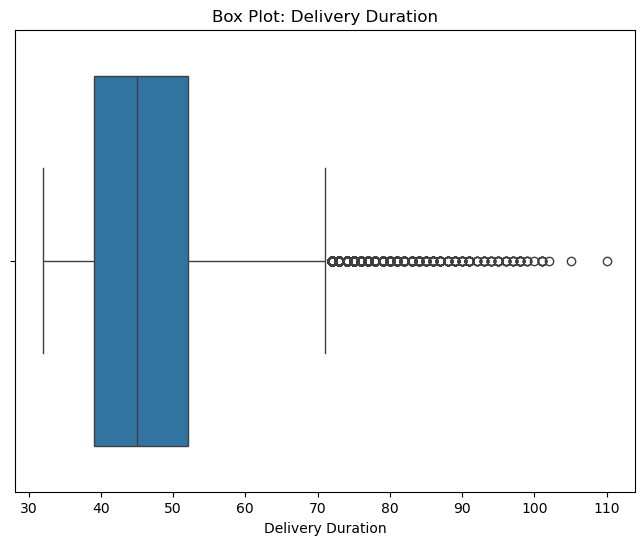

In [41]:
# Boxplot for time_taken

plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train)  # 'y_train' is the target variable, i.e., 'delivery_duration'
plt.title('Box Plot: Delivery Duration')
plt.xlabel('Delivery Duration')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

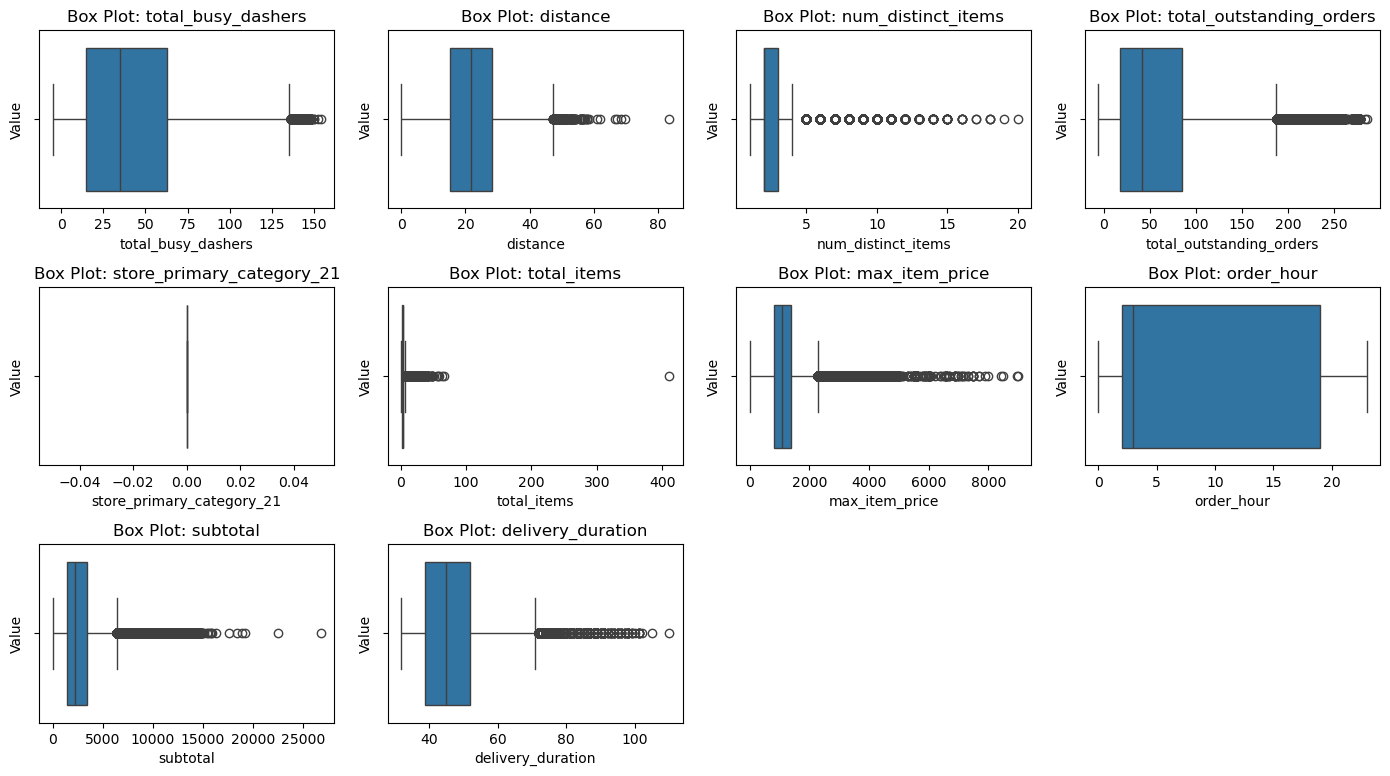

In [43]:
# Handle outliers

# Plot box plots for numerical features in the training set
numerical_cols = list(set(X_train.columns.tolist()) - set(weakly_correlated_cols))

plt.figure(figsize=(14, 10))

# Loop through each numerical feature and plot a boxplot
for i, col in enumerate(numerical_cols + ['delivery_duration'], 1):  # Include 'delivery_duration' as a target feature
    plt.subplot(4, 4, i)  # Adjust the number of subplots as needed
    sns.boxplot(x=X_train_filtered_1[col] if col != 'delivery_duration' else y_train)
    plt.title(f'Box Plot: {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [51]:
# Handle Outliers

# Function to remove outliers 
def remove_outliers(df, columns_to_filter):
    df_removed = df.copy()
    for col in columns_to_filter:
        # Calculate the quartiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate the IQR
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for non-outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter rows within the bounds
        df_removed = df_removed[(df_removed[col] >= lower_bound) & (df_removed[col] <= upper_bound)]
    
    return df_removed

# Remove outliers for all numerical columns in the filtered training set
numerical_cols_temp= numerical_cols.copy()
numerical_cols_temp.remove('store_primary_category_21')
train_data_filtered_1 = pd.concat([X_train_filtered_1, y_train], axis=1)

train_data_no_outliers = remove_outliers(train_data_filtered_1[numerical_cols + ['delivery_duration']], numerical_cols_temp + ['delivery_duration'])

X_train_cleaned = train_data_no_outliers[numerical_cols]
y_train_cleaned = train_data_no_outliers['delivery_duration']

In [53]:
print(f"Shape of the final dataset: after removing outliers {X_train_cleaned.shape}")

# Check for missing values in the entire dataset (all columns)
missing_values = X_train_cleaned.isnull().sum()

# Display the number of missing values per column
print(missing_values)


Shape of the final dataset: after removing outliers (112681, 9)
total_busy_dashers           0
distance                     0
num_distinct_items           0
total_outstanding_orders     0
store_primary_category_21    0
total_items                  0
max_item_price               0
order_hour                   0
subtotal                     0
dtype: int64


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [55]:
# Import libraries

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [57]:
# Apply scaling to the numerical columns


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale all columns in the cleaned training set
X_train_scaled = X_train_cleaned.copy()  
y_train_scaled = pd.DataFrame(y_train_cleaned).copy()  

train_data_scaled = pd.concat([X_train_scaled,y_train_scaled],axis=1)

numerical_cols = list(set(X_train.columns.tolist()) - set(weakly_correlated_cols))
cols_temp = numerical_cols + ['delivery_duration']

# Scale
train_data_scaled[cols_temp] = scaler.fit_transform(train_data_scaled[cols_temp])
X_train_scaled[numerical_cols] = train_data_scaled[numerical_cols]
y_train_scaled[['delivery_duration']] = train_data_scaled[['delivery_duration']]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [59]:
# Create/Initialise the model

# We are using statsmodel to build the model
# We will try building a model with all the columns (which are strongly correlated) and then analyze the p values and VIF to eleminate the features

X_train_sm = sm.add_constant(X_train_scaled[['distance', 'subtotal','total_outstanding_orders', 'num_distinct_items', 'order_hour', 'max_item_price', 
                                             'total_items', 'total_busy_dashers']])
lr = sm.OLS(y_train_scaled, X_train_sm)
lr_model = lr.fit()

print(lr_model.params)
print(lr_model.summary())

#From the summary below we see that p values of all the features are 0.

const                       0.030492
distance                    0.559352
subtotal                    0.220514
total_outstanding_orders    1.152198
num_distinct_items          0.042790
order_hour                 -0.114850
max_item_price              0.043077
total_items                -0.015052
total_busy_dashers         -1.208421
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      delivery_duration   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                 2.547e+04
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:52:21   Log-Likelihood:                 75334.
No. Observations:              112681   AIC:                        -1.506e+05
Df Residuals:                  112672   BIC:                        -1.506e+05
Df Model:           

In [65]:
# To elimninate multicolinearity which could cause model overfitting, lets find VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
X=X_train_scaled [['distance', 'subtotal','total_outstanding_orders', 'num_distinct_items', 'order_hour', 'max_item_price', 
                                             'total_items', 'total_busy_dashers']]

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

#From below, we see that VIF of some features are very high. Generally we would consider features with VIF < 5. 
#So, we would eliminate features one by one to arrive at final list of features with VIF <5

                   Features    VIF
7        total_busy_dashers  22.65
2  total_outstanding_orders  19.27
1                  subtotal  16.31
5            max_item_price  13.87
6               total_items  10.83
3        num_distinct_items   8.71
0                  distance   5.44
4                order_hour   1.96


In [67]:
# So, after iteritavely removing feature one by one and then analayzing the re-computed VIF, we arrived at below 4 features
X = X_train_scaled[['distance','total_outstanding_orders', 'num_distinct_items', 'order_hour']]

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

#We see VIF of the below 4 features are < 5 and hence we will take the below 4 features to build the model

                   Features   VIF
0                  distance  3.91
1  total_outstanding_orders  2.38
2        num_distinct_items  2.19
3                order_hour  1.83


In [73]:
# Train the model using the training data

X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train_scaled, X_train_sm)
lr_model = lr.fit()

print(lr_model.params)
print(lr_model.summary())

#Note: The R-squared value of model with above 4 features comes to 0.409

const                       0.024590
distance                    0.549977
total_outstanding_orders    0.168168
num_distinct_items          0.102538
order_hour                 -0.124973
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      delivery_duration   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 1.953e+04
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:59:21   Log-Likelihood:                 46819.
No. Observations:              112681   AIC:                        -9.363e+04
Df Residuals:                  112676   BIC:                        -9.358e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
          

In [75]:
# Make predictions

# Now before we do predictions, we need to make sure that pre-processing is done (Scaling is done - as we had done scaling in train dataset)

# We will use scalar from train data set and just use it to transform on test dataset

X_test_scaled = pd.DataFrame(X_test).copy() 
y_test_scaled = pd.DataFrame(y_test).copy() 

test_data_scaled = pd.concat([X_test_scaled,y_test_scaled],axis=1)
numerical_cols_temp = numerical_cols + ['delivery_duration']

# Scale the numerical columns
test_data_scaled[numerical_cols_temp] = scaler.transform(test_data_scaled[numerical_cols_temp]) #Note we are only using transform only

# Scale the numerical columns
X_test_scale = test_data_scaled[numerical_cols]
y_test_scaled[['delivery_duration']] = test_data_scaled[['delivery_duration']]

In [77]:
# Now make predictions

X_test_sm = sm.add_constant(X_test_scale[['distance','total_outstanding_orders', 'num_distinct_items', 'order_hour']])
y_test_pred = lr_model.predict(X_test_sm)

In [79]:
# Find results for evaluation metrics

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_scaled, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_scaled, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test_scaled, y_test_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.1371486218693093
Mean Squared Error (MSE): 0.032083556747483775
Root Mean Squared Error (RMSE): 0.17911883415063803
R-squared (R²): 0.44246996433492103


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [81]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE

#Here we will use scikit learn for RFE
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

rfe = RFE(model)
rfe = rfe.fit(X_train_scaled, y_train_scaled)

In [83]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('total_busy_dashers', True, 1),
 ('distance', True, 1),
 ('num_distinct_items', False, 4),
 ('total_outstanding_orders', True, 1),
 ('store_primary_category_21', False, 6),
 ('total_items', False, 5),
 ('max_item_price', False, 3),
 ('order_hour', False, 2),
 ('subtotal', True, 1)]

In [85]:
selected_cols = X_train_scaled.columns[rfe.support_]
selected_cols

Index(['total_busy_dashers', 'distance', 'total_outstanding_orders',
       'subtotal'],
      dtype='object')

In [89]:
# Build the final model with selected number of features

X_train_rfe = X_train_scaled[selected_cols]

X_train_rfe = sm.add_constant(X_train_rfe)
lm_final = sm.OLS(y_train_scaled, X_train_rfe).fit()

print(lm_final.summary())

#Note: We see below that R2 of final model is 0.603

                            OLS Regression Results                            
Dep. Variable:      delivery_duration   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                 4.271e+04
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:11:37   Log-Likelihood:                 69141.
No. Observations:              112681   AIC:                        -1.383e+05
Df Residuals:                  112676   BIC:                        -1.382e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Text(0.5, 0, 'Errors')

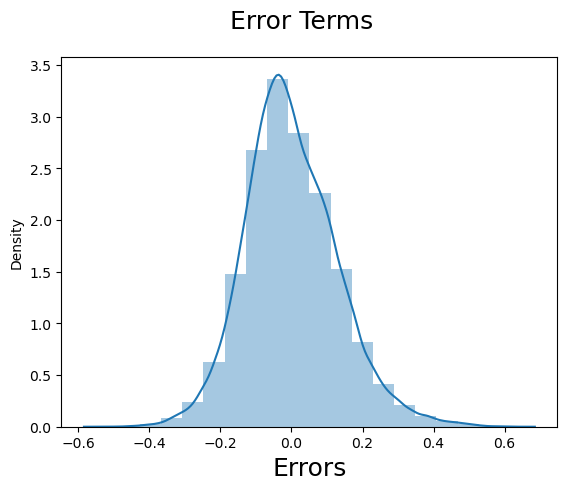

In [91]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_train_pred_final = lm_final.predict(X_train_rfe)

fig = plt.figure()
res_final = y_train_scaled['delivery_duration'] - y_train_pred_final
sns.distplot(res_final, bins =20)
fig.suptitle('Error Terms', fontsize =18)
plt.xlabel('Errors', fontsize =18)
#So we see that the plot is centered around 0

In [95]:
# Final Predictions on Test Data

X_test_new = X_test_scale[selected_cols]
X_test_new = sm.add_constant(X_test_new)

y_pred_test = lm_final.predict(X_test_new)
print(y_pred_test)

50609    0.392026
49181    0.758941
4526     0.178192
131      0.333035
57096    0.331831
           ...   
66574    0.515533
33251    0.215341
76943    0.022146
43932    0.197759
49931    0.184139
Length: 35156, dtype: float64


In [97]:
# Results for final model evaluation metrics

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_scaled, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_scaled, y_pred_test)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test_scaled, y_pred_test)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.10647381144222386
Mean Squared Error (MSE): 0.019432448690095715
Root Mean Squared Error (RMSE): 0.13940031811332323
R-squared (R²): 0.6623138171207101


Text(0, 0.5, 'y_pred')

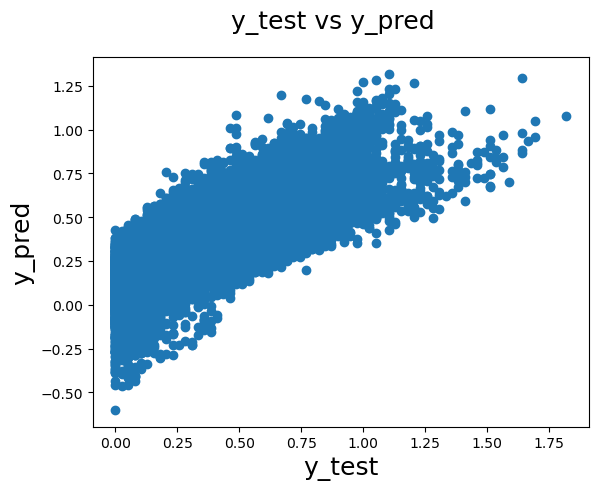

In [102]:
# Model evaluation

fig = plt.figure()
plt.scatter(y_test_scaled,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize =18)
plt.xlabel('y_test', fontsize =18)
plt.ylabel('y_pred', fontsize =18)

[Your inferences here:]

Hence as we see above, that the R2 of final model is 0.662 

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [106]:
# Compare the scaled vs unscaled features used in the final model

# Fit a Linear Regression Model on unscaled data
model_unscaled = LinearRegression()
model_unscaled.fit(X_train[selected_cols], y_train)

# Get the coefficients
unscaled_coefficients = pd.DataFrame(model_unscaled.coef_, selected_cols, columns=['Coefficient'])
print("Unscaled Coefficients:")
print(unscaled_coefficients)

#For scaled data

# Fit a Linear Regression Model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled[selected_cols], y_train_scaled)

# Get the scaled coefficients
scaled_coefficients = pd.DataFrame(model_scaled.coef_.reshape(-1,1), selected_cols , columns=['Scaled Coefficient'])
print("\nScaled Coefficients:")
print(scaled_coefficients)

# Note:
# Scaled coefficients give a better understanding of how each feature affects the target, considering the distribution of the features.

# Larger scaled coefficients mean that the feature has a stronger influence on the target variable.

# Smaller scaled coefficients mean that the feature has a weaker influence on the target variable.

Unscaled Coefficients:
                          Coefficient
total_busy_dashers          -0.351415
distance                     0.472260
total_outstanding_orders     0.256505
subtotal                     0.001832

Scaled Coefficients:
                          Scaled Coefficient
total_busy_dashers                 -1.198007
distance                            0.559754
total_outstanding_orders            1.206286
subtotal                            0.321815


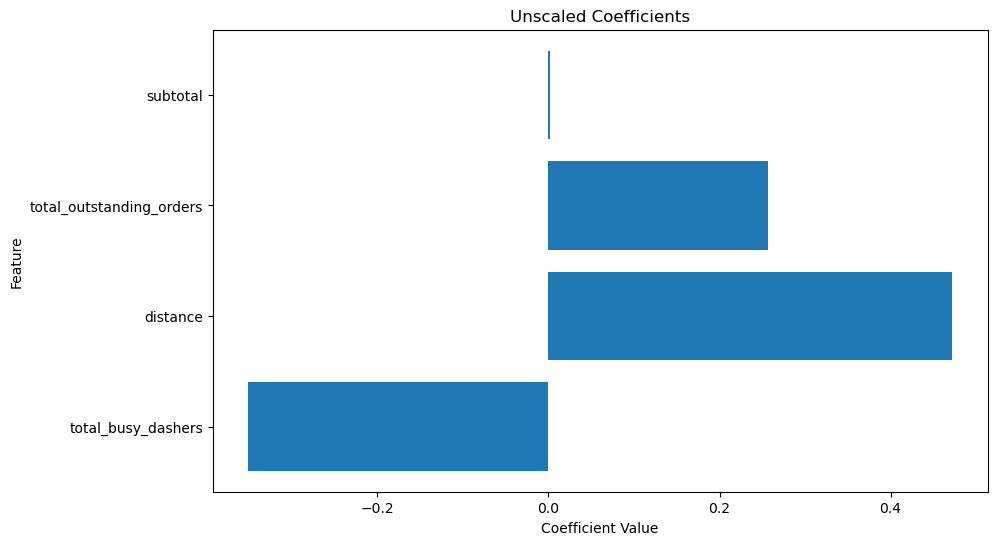

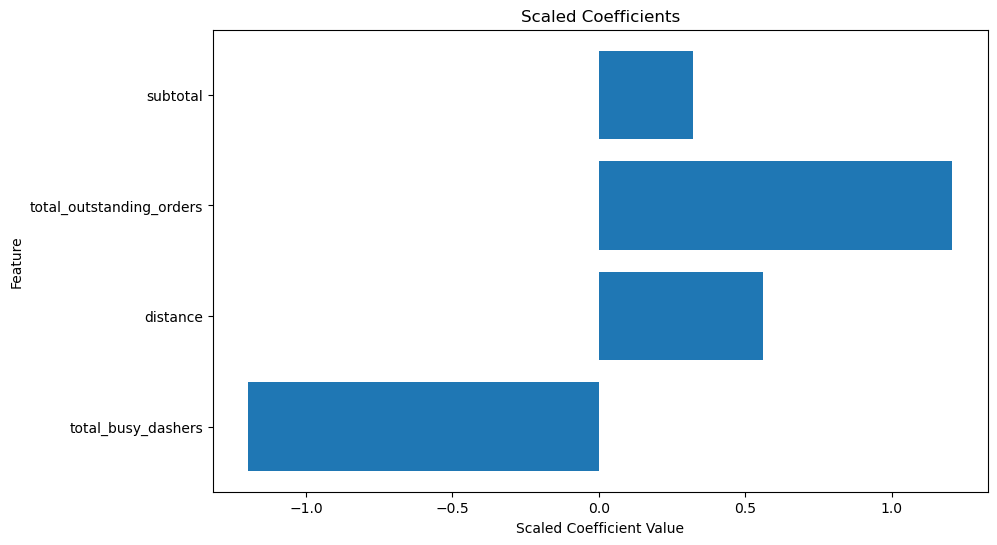

In [108]:
import matplotlib.pyplot as plt

# Plot the unscaled coefficients
plt.figure(figsize=(10, 6))
plt.barh(unscaled_coefficients.index, unscaled_coefficients['Coefficient'])
plt.title('Unscaled Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot the scaled coefficients
plt.figure(figsize=(10, 6))
plt.barh(scaled_coefficients.index, scaled_coefficients['Scaled Coefficient'])
plt.title('Scaled Coefficients')
plt.xlabel('Scaled Coefficient Value')
plt.ylabel('Feature')
plt.show()

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [110]:
# Analyze the effect of a unit change in a feature, say 'total_items'

#Analysis:
# Unscaled Coefficients: Directly represent the change in the target for a 1 unit change in the feature

# Scaled coefficients Represent the change in the target for a 1 standard deviation increase in the feature. 
# To interpret these in terms of unit changes, multiply by the standard deviation of the feature.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> There were two categorical variables 'store_primary_category' and 'order_protocol' in the provided dataset. I created another derived categorical column isWeekend . But based on the analysis, I saw that there is no major influence of the given categorical variable on the dependent variable



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> We have split the dataset such that 80% of the records are training dataset and 20% of records are testing dataset. So, factor 0.2 means that split the given dataset such that 20% records will be taken as test dataset



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> From heatmap, we see that 'distance' has highest correlation with the target variable with value 0.46



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> I first plotted the box plots for the numerical columns to visualize the outliers.
> Then I dropped the outlier records for each numerical column if it falls beyond IQR



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> total_outstanding_orders, total_busy_dashers , distance



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is one of the most fundamental and widely used algorithms in statistics and machine learning. It aims to model the relationship between one or more independent variables (predictors) and a dependent variable (target or outcome) by fitting a linear equation to observed data.
In simple terms, it predicts a continuous output based on input features by finding the best-fitting line (in simple linear regression) or hyperplane (in multiple linear regression).
> The objective of linear regression is to find the best-fitting line (or hyperplane) that minimizes the difference between the predicted values and the actual values of the target variable.
This "difference" is quantified by the Residual Sum of Squares (RSS), which measures the squared differences between the actual and predicted values.
The goal is to minimize this sum to obtain the best model. Mathematically, this is achieved by minimizing the cost function (or loss function), which typically is the Mean Squared Error (MSE).



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Both Simple Linear Regression and Multiple Linear Regression are techniques used to model the relationship between one or more predictor (independent) variables and a dependent (target) variable. However, they differ in the number of independent variables used for prediction.
>Simple Linear Regression is appropriate when you have a single independent variable, and you need to understand its direct influence on the dependent variable.
>Multiple Linear Regression is used when multiple independent variables affect the dependent variable, and it allows you to model more complex relationships and make predictions based on multiple predictors.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> In linear regression, the cost function (also known as the loss function) plays a crucial role in guiding the model to make accurate predictions. The cost function measures how well the model's predictions align with the actual observed data. Its primary purpose is to quantify the error or difference between the predicted values and the actual values of the target variable.
>
> For linear regression, the most common cost function used is the Mean Squared Error (MSE) or Residual Sum of Squares (RSS). The cost function calculates the sum of squared differences between the actual and predicted values of the dependent variable.
>
> The goal in linear regression is to minimize the cost function (MSE or RSS) by adjusting the model parameters such that the difference between the predicted and actual values is as small as possible.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting occurs when a model learns the noise or irrelevant patterns in the training data instead of the underlying general patterns. As a result, the model becomes too complex and fits the training data very well, but it performs poorly on new, unseen data (i.e., it has poor generalization).
>
> Underfitting occurs when a model is too simple to capture the underlying patterns in the data. The model fails to learn enough from the training data, resulting in poor performance on both the training set and new, unseen data.
>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plots are a valuable diagnostic tool in linear regression as they help assess the validity of the model's assumptions and highlight potential issues with the model fit. Residuals are the differences between the actual observed values and the predicted values from the model. A residual plot is a graphical representation of these residuals against various other variables or predictions.
> 
> Residual plots are a powerful tool for diagnosing the assumptions and performance of a linear regression model. By analyzing residuals, you can detect:
> 1. Linearity: Whether the relationship between variables is truly linear.
> 2. Homoscedasticity: Whether the variance of the residuals is constant across predicted values.
> 3. Normality: Whether residuals follow a normal distribution, which is important for certain statistical tests.
> 4. Outliers and Influential Points: Whether specific data points are disproportionately affecting the model.